- Crear una señal de datos
- Separar la señal por pares de bits
- Codificar la señal

# Codificar En Huffman

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import square
from collections import Counter
import heapq
from itertools import count

class _Node:
    __slots__ = ("freq", "char", "left", "right")
    def __init__(self, freq, char=None, left=None, right=None):
        self.freq = freq
        self.char = char
        self.left = left
        self.right = right

def _build_huffman_tree(message: str) -> _Node:
    """
    Construye el árbol de Huffman para el mensaje.
    Maneja el caso borde de un único símbolo en el mensaje.
    """
    if not message:
        raise ValueError("El mensaje no puede ser vacío.")

    freq = Counter(message)
    pq, tie = [], count()
    for ch, f in freq.items():
        # (frecuencia, orden, nodo)
        heapq.heappush(pq, (f, next(tie), _Node(f, char=ch)))

    # Caso especial: solo un símbolo -> crea un árbol con un hijo
    if len(pq) == 1:
        f, _, node = heapq.heappop(pq)
        root = _Node(f, left=node, right=None)
        return root

    while len(pq) > 1:
        f1, _, n1 = heapq.heappop(pq)
        f2, _, n2 = heapq.heappop(pq)
        parent = _Node(f1 + f2, left=n1, right=n2)
        heapq.heappush(pq, (parent.freq, next(tie), parent))

    return heapq.heappop(pq)[2]

def _build_codes(root: _Node) -> dict:
    """
    Recorre el árbol y genera el diccionario {caracter: código_en_bits}.
    """
    codes = {}

    def dfs(node, path):
        if node.char is not None:          # hoja
            codes[node.char] = path or "0" # si hay un solo símbolo, asígnale "0"
            return
        if node.left:
            dfs(node.left, path + "0")
        if node.right:
            dfs(node.right, path + "1")

    dfs(root, "")
    return codes

def huffman_encode(message: str):
    """
    Codifica `message` con Huffman.
    Returns:
        bits: str  -> secuencia de '0' y '1'
        codes: dict -> mapa {caracter: código}
    """
    root = _build_huffman_tree(message)
    codes = _build_codes(root)
    bits = "".join(codes[ch] for ch in message)
    return bits, codes

def huffman_decode(bits: str, codes: dict) -> str:
    """
    Decodifica la secuencia de bits usando el diccionario de códigos.
    """
    if not bits and codes:
        return ""  # nada que decodificar

    # Para decodificar eficientemente, invertimos el diccionario
    inv = {code: ch for ch, code in codes.items()}

    out = []
    acc = ""
    for b in bits:
        acc += b
        if acc in inv:
            out.append(inv[acc])
            acc = ""
    if acc:
        raise ValueError("Bits sobrantes: el flujo de bits no coincide con los códigos.")
    return "".join(out)

msg = "En un lugar de la Mancha, de cuyo nombre no quiero acordarme"
bits, codes = huffman_encode(msg)
print("Bits:", bits)
print("Códigos:", codes)
print("Decodificado:", huffman_decode(bits, codes))


Bits: 10011010110010001011000111110001001110101100001111111010001111010001010000101011011010100101010101000111111101000110100010101111100010111110100101111001100110100101111100011110110000111011011100111000010011011101100111110101100100101101
Códigos: {' ': '00', 'a': '010', 'c': '0110', 'i': '01110', 'l': '01111', 'u': '1000', 'm': '10010', 'E': '100110', 'g': '100111', 'M': '101000', 'h': '101001', ',': '101010', 'y': '101011', 'n': '1011', 'r': '1100', 'e': '1101', 'o': '1110', 'b': '111100', 'q': '111101', 'd': '11111'}
Decodificado: En un lugar de la Mancha, de cuyo nombre no quiero acordarme


# Creacion de Mensaje

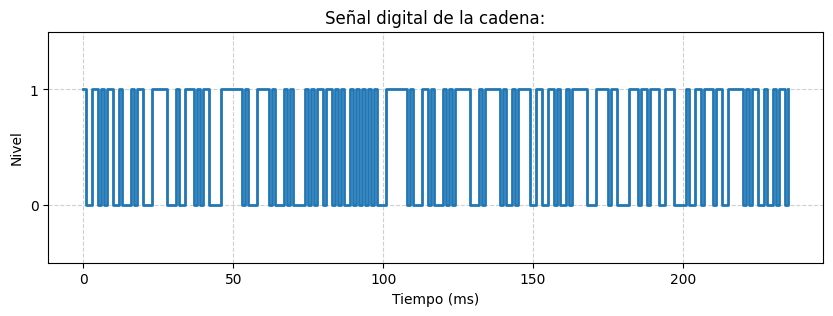

In [36]:

def graficar_bits(bits):
    # Crear 100 muestras por bit y al final unirlas
    for b in bits:
        if b == '0':
            segmento = np.zeros(1)
        else:
            segmento = np.ones(1)
        if 'y' in locals():
            y = np.concatenate((y, segmento))
        else:
            y = segmento
    # Crear la forma escalonada
    t=np.arange(0, len(bits)*1)  # Tiempo en ms
    plt.figure(figsize=(10, 3))
    plt.step(t, y, where='post', linewidth=2)
    plt.ylim(-0.5, 1.5)
    plt.yticks([0, 1])
    plt.xlabel('Tiempo (ms)')
    plt.ylabel('Nivel')
    plt.title(f'Señal digital de la cadena:')
    plt.grid(True, which='both', linestyle='--', alpha=0.6)
    plt.show()
    return t, y

# Ejemplo de uso
cadena = bits
t, señal=graficar_bits(cadena)
longitud_señal = len(señal)


# Creacion del delay

['10', '01', '10', '10', '11', '00', '10', '00', '10', '11', '00', '01', '11', '11', '00', '01', '00', '11', '10', '10', '11', '00', '00', '11', '11', '11', '10', '10', '00', '11', '11', '01', '00', '01', '01', '00', '00', '10', '10', '11', '01', '10', '10', '10', '01', '01', '01', '01', '01', '00', '01', '11', '11', '11', '01', '00', '01', '10', '10', '00', '10', '10', '11', '11', '10', '00', '10', '11', '11', '10', '10', '01', '01', '11', '10', '01', '10', '01', '10', '10', '01', '01', '11', '11', '00', '01', '11', '10', '11', '00', '00', '11', '10', '11', '01', '11', '00', '11', '10', '00', '01', '00', '11', '01', '11', '01', '10', '01', '11', '11', '01', '01', '10', '01', '00', '10', '11', '01']


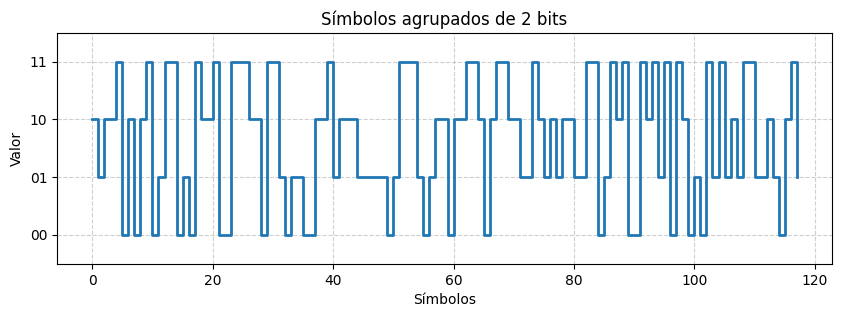

[(1, -1), (-1, 1), (1, -1), (1, -1), (1, 1), (-1, -1), (1, -1), (-1, -1), (1, -1), (1, 1), (-1, -1), (-1, 1), (1, 1), (1, 1), (-1, -1), (-1, 1), (-1, -1), (1, 1), (1, -1), (1, -1), (1, 1), (-1, -1), (-1, -1), (1, 1), (1, 1), (1, 1), (1, -1), (1, -1), (-1, -1), (1, 1), (1, 1), (-1, 1), (-1, -1), (-1, 1), (-1, 1), (-1, -1), (-1, -1), (1, -1), (1, -1), (1, 1), (-1, 1), (1, -1), (1, -1), (1, -1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, -1), (-1, 1), (1, 1), (1, 1), (1, 1), (-1, 1), (-1, -1), (-1, 1), (1, -1), (1, -1), (-1, -1), (1, -1), (1, -1), (1, 1), (1, 1), (1, -1), (-1, -1), (1, -1), (1, 1), (1, 1), (1, -1), (1, -1), (-1, 1), (-1, 1), (1, 1), (1, -1), (-1, 1), (1, -1), (-1, 1), (1, -1), (1, -1), (-1, 1), (-1, 1), (1, 1), (1, 1), (-1, -1), (-1, 1), (1, 1), (1, -1), (1, 1), (-1, -1), (-1, -1), (1, 1), (1, -1), (1, 1), (-1, 1), (1, 1), (-1, -1), (1, 1), (1, -1), (-1, -1), (-1, 1), (-1, -1), (1, 1), (-1, 1), (1, 1), (-1, 1), (1, -1), (-1, 1), (1, 1), (1, 1), (-1, 1), (-1, 1), (1

In [37]:
# Agrupar de a dos en dos bits sabiendo que la señal cambia cada 50/len(cadena) muestras a partir de la señal generada anteriormente
def agrupar_bits(señal, duracion_bit, num_bits=2):
    simbolos = []
    muestras_por_simbolo = duracion_bit * num_bits
    for i in range(0, len(señal), muestras_por_simbolo):
        bits_simbolo = ''
        for j in range(num_bits):
            inicio = i + j * duracion_bit
            fin = inicio + duracion_bit
            if fin <= len(señal):
                bit = '1' if np.mean(señal[inicio:fin]) > 0.5 else '0'
                bits_simbolo += bit
        if len(bits_simbolo) == num_bits:
            simbolos.append(bits_simbolo)
    return simbolos
simbolos = agrupar_bits(señal, duracion_bit=1, num_bits=2)
print(simbolos)
# Graficar los simbolos agrupados
def graficar_simbolos(simbolos):
    plt.figure(figsize=(10, 3))
    plt.step(range(len(simbolos)), [int(s, 2) for s in simbolos], where='post', linewidth=2)
    plt.ylim(-0.5, 3.5)
    plt.yticks(range(4), ['00', '01', '10', '11'])
    plt.xlabel('Símbolos')
    plt.ylabel('Valor')
    plt.title('Símbolos agrupados de 2 bits')
    plt.grid(True, which='both', linestyle='--', alpha=0.6)
    plt.show()
graficar_simbolos(simbolos)
# mapear los simbolos a 4QAM
def mapear_4QAM(simbolos):
    mapping = {
        '00': (-1, -1),
        '01': (-1, 1),
        '10': (1, -1),
        '11': (1, 1)
    }
    señales_4QAM = [mapping[s] for s in simbolos]
    return señales_4QAM
señales_4QAM = mapear_4QAM(simbolos)
print(señales_4QAM)


# Crear Portadora a 4Mhz

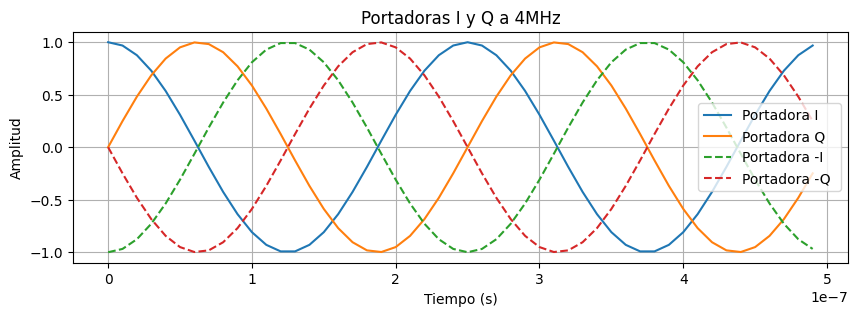

0.236


In [48]:
# crear portadora de 4Mhz y sus desfases
fs = 100000000  # frecuencia de muestreo 1MHz
fc = 4000000  # frecuencia de la portadora 4MHz
# Calcular compensacion de fase para la modulacion se de en fase 0 en el inicio de la señal
compensacion = 0
t_portadora = np.arange(0, len(t)/1000, 1/fs)
portadora_I = np.cos(2 * np.pi * fc * t_portadora+ compensacion)
portadora_Q = np.sin(2 * np.pi * fc * t_portadora+ compensacion)
portadora_Minus_I = np.cos(2 * np.pi * fc * t_portadora+ np.pi + compensacion)
portadora_Minus_Q = np.sin(2 * np.pi * fc * t_portadora+ np.pi + compensacion)
# Graficar portadoras
plt.figure(figsize=(10, 3))
plt.plot(t_portadora[:50], portadora_I[:50], label='Portadora I ')
plt.plot(t_portadora[:50], portadora_Q[:50], label='Portadora Q ')
plt.plot(t_portadora[:50], portadora_Minus_I[:50], label='Portadora -I ', linestyle='--')
plt.plot(t_portadora[:50], portadora_Minus_Q[:50], label='Portadora -Q ', linestyle='--')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Portadoras I y Q a 4MHz')
plt.legend()
plt.grid(True)
plt.show()
# Imprimir longitud de t_portadora en segundos
print(len(t_portadora)/ fs) 

# Selector de portadora

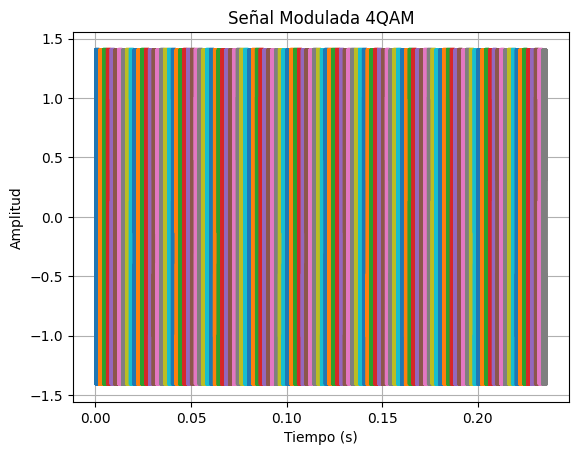

In [43]:
# Seleccionar la portadora según el símbolo 4QAM
def modular_4QAM(señales_4QAM, t_portadora, portadora_I, portadora_Q, portadora_Minus_I, portadora_Minus_Q):
    señal_modulada = np.zeros(len(t_portadora))
    muestras_por_simbolo = int(len(t_portadora) / len(señales_4QAM))
    for i, (I, Q) in enumerate(señales_4QAM):
        start = i * muestras_por_simbolo
        end = start + muestras_por_simbolo
        if I == 1 and Q == 1:
            señal_modulada[start:end] = portadora_I[start:end]+portadora_Q[start:end]
        elif I == 1 and Q == -1:
            señal_modulada[start:end] = portadora_Minus_Q[start:end]+portadora_I[start:end]
        elif I == -1 and Q == 1:
            señal_modulada[start:end] = portadora_Minus_I[start:end]+portadora_Q[start:end]
        elif I == -1 and Q == -1:
            señal_modulada[start:end] = portadora_Minus_Q[start:end]+portadora_Minus_I[start:end]
    return señal_modulada
señal_4QAM = modular_4QAM(señales_4QAM, t_portadora, portadora_I, portadora_Q, portadora_Minus_I, portadora_Minus_Q)
# Graficar señal modulada 4QAM

# Graficar todos los cambios de fase
for i in range(len(señales_4QAM)-1):
    start = (i+1) * int(len(t_portadora) / len(señales_4QAM))
    #plt.figure(figsize=(10, 3))
    #plt.plot(t_portadora[start-50:start+50], señal_4QAM[start-50:start+50], label=f'Cambio de símbolo {señales_4QAM[i]} a {señales_4QAM[i+1]}')
    if(False):
        if señales_4QAM[i] == (1, 1):
            plt.plot(t_portadora[start-50:start+50], (portadora_I+portadora_Q)[start-50:start+50], label='Portadora I,Q ', alpha=0.5)
            #plt.plot(t_portadora[start-50:start+50], portadora_Q[start-50:start+50], label='Portadora Q ')
        elif señales_4QAM[i] == (1, -1):
            plt.plot(t_portadora[start-50:start+50], (portadora_I+portadora_Minus_Q)[start-50:start+50], label='Portadora I,-Q ', alpha=0.5)
            #plt.plot(t_portadora[start-50:start+50], portadora_Minus_Q[start-50:start+50], label='Portadora -Q ')
        elif señales_4QAM[i] == (-1, 1):
            plt.plot(t_portadora[start-50:start+50], (portadora_Minus_I+portadora_Q)[start-50:start+50], label='Portadora -I,Q ', alpha=0.5)
            #plt.plot(t_portadora[start-50:start+50], portadora_Q[start-50:start+50], label='Portadora Q ')
        elif señales_4QAM[i] == (-1, -1):
            plt.plot(t_portadora[start-50:start+50], (portadora_Minus_I+portadora_Minus_Q)[start-50:start+50], label='Portadora -I,-Q ', alpha=0.5)
            #plt.plot(t_portadora[start-50:start+50], portadora_Minus_Q[start-50:start+50], label='Portadora -Q ')
    if(False):
        if señales_4QAM[i+1] == (1, 1):
            plt.plot(t_portadora[start-50:start+50], (portadora_I+portadora_Q)[start-50:start+50], label='Portadora I,Q ', alpha=0.5)
            #plt.plot(t_portadora[start-50:start+50], portadora_Q[start-50:start+50], label='Portadora Q ')
        elif señales_4QAM[i+1] == (1, -1):
            plt.plot(t_portadora[start-50:start+50], (portadora_I+portadora_Minus_Q)[start-50:start+50], label='Portadora I,-Q ', alpha=0.5)
            #plt.plot(t_portadora[start-50:start+50], portadora_Minus_Q[start-50:start+50], label='Portadora -Q ')
        elif señales_4QAM[i+1] == (-1, 1):
            plt.plot(t_portadora[start-50:start+50], (portadora_Minus_I+portadora_Q)[start-50:start+50], label='Portadora -I,Q ', alpha=0.5)
            #plt.plot(t_portadora[start-50:start+50], portadora_Q[start-50:start+50], label='Portadora Q ')
        elif señales_4QAM[i+1] == (-1, -1):
            plt.plot(t_portadora[start-50:start+50], (portadora_Minus_I+portadora_Minus_Q)[start-50:start+50], label='Portadora -I,-Q ', alpha=0.5)
            #plt.plot(t_portadora[start-50:start+50], portadora_Minus_Q[start-50:start+50], label='Portadora -Q ')
        
    #plt.title('Cambio de fase en señal 4QAM'+f' de {señales_4QAM[i]} a {señales_4QAM[i+1]}')
    #plt.legend()
    #plt.show()
plt.figure()
for i in range(len(señales_4QAM)):
    start = i * int(len(t_portadora) / len(señales_4QAM))
    end = start + int(len(t_portadora) / len(señales_4QAM))
    plt.plot(t_portadora[start:end], señal_4QAM[start:end], label=f'Símbolo {señales_4QAM[i]}')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Modulada 4QAM')
#plt.legend()
plt.grid(True)
plt.show()


# Demodulacion

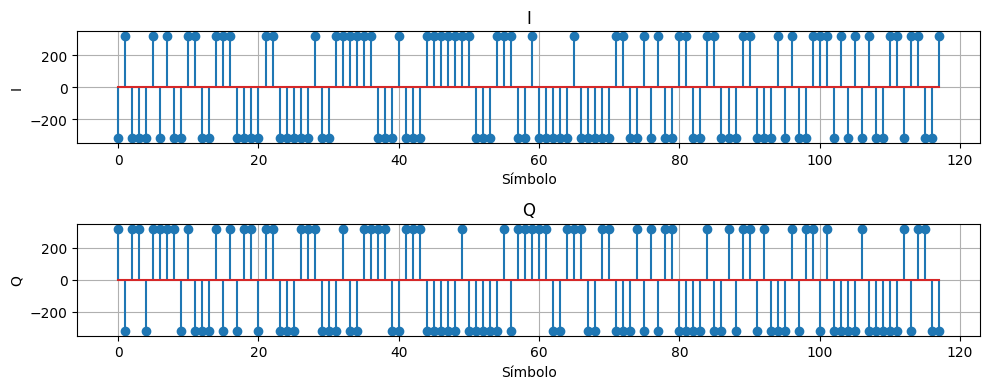

In [40]:
def demodular_4QAM(señal_recibida,
                   t_portadora,
                   portadora_I,
                   portadora_Q,
                   muestras_por_simbolo,
                   quitar_dc=True,
                   devolver_bits=True,
                   devolver_metricas=False):
    N = len(señal_recibida)
    n_simbolos = N // muestras_por_simbolo

    señales_estimadas = []
    corr_I_all, corr_Q_all = [], []

    # Energía por símbolo de las plantillas (para normalizar)
    # Usamos energía por ventana para tolerar pequeñas no-idealidades.
    for k in range(n_simbolos):
        ini = k * muestras_por_simbolo
        fin = ini + muestras_por_simbolo

        seg = señal_recibida[ini:fin].astype(float).copy()
        Iref = portadora_I[ini:fin].astype(float)
        Qref = portadora_Q[ini:fin].astype(float)

        if quitar_dc:
            seg -= np.mean(seg)

        EI = np.sum(Iref**2) + 1e-12
        EQ = np.sum(Qref**2) + 1e-12

        # Correlaciones normalizadas (métricas blandas)
        cI = np.sum(seg * Iref) / np.sqrt(EI)
        cQ = np.sum(seg * Qref) / np.sqrt(EQ)

        corr_I_all.append(cI)
        corr_Q_all.append(cQ)

        # Decisión dura por signo
        I_hat = 1 if cI >= 0 else -1
        Q_hat = 1 if cQ >= 0 else -1

        señales_estimadas.append((I_hat, Q_hat))

    out = [señales_estimadas]

    if devolver_bits:
        # Mapeo Gray consistente con tu esquema:
        # (+1,+1)->00, (-1,+1)->01, (-1,-1)->11, (+1,-1)->10
        bits = []
        for I_hat, Q_hat in señales_estimadas:
            if I_hat == 1 and Q_hat == 1:
                bits += [0, 0]
            elif I_hat == -1 and Q_hat == 1:
                bits += [0, 1]
            elif I_hat == -1 and Q_hat == -1:
                bits += [1, 1]
            elif I_hat == 1 and Q_hat == -1:
                bits += [1, 0]
        out.append(np.array(bits, dtype=int))

    if devolver_metricas:
        metricas = {
            'corr_I': np.array(corr_I_all),
            'corr_Q': np.array(corr_Q_all)
        }
        out.append(metricas)

    return tuple(out) if len(out) > 1 else out[0]
muestras_por_simbolo = int(len(t_portadora) / len(señales_4QAM))

señales_est, bits_rec, metricas = demodular_4QAM(
    señal_recibida=señal_4QAM,            # o tu señal con ruido/canal
    t_portadora=t_portadora,
    portadora_I=portadora_I,
    portadora_Q=portadora_Q,
    muestras_por_simbolo=muestras_por_simbolo,
    quitar_dc=True,
    devolver_bits=True,
    devolver_metricas=True
)

# Graficar las métricas blandas
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.stem(-metricas['corr_I'])
plt.title('I')
plt.xlabel('Símbolo')
plt.ylabel('I')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.stem(-metricas['corr_Q'])
plt.title('Q')
plt.xlabel('Símbolo')
plt.ylabel('Q')
plt.grid(True)
plt.tight_layout()
plt.show()

# Crear Decodificacion

Bits Decodificados: 10011010110010001011000111110001001110101100001111111010001111010001010000101011011010100101010101000111111101000110100010101111100010111110100101111001100110100101111100011110110000111011011100111000010011011101100111110101100100101101


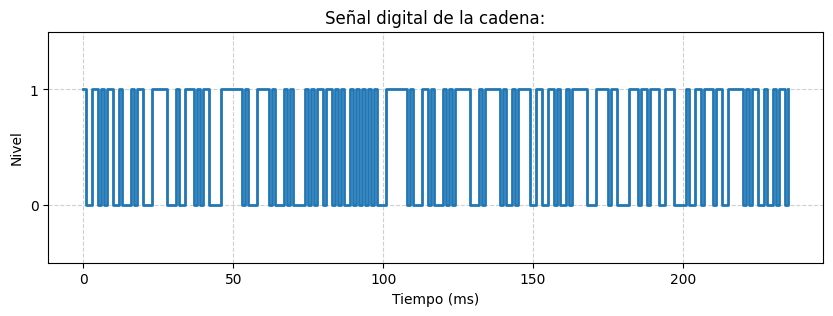

In [41]:
# Crear decodificación de bits sabiendo que:
#        '00': (-1, -1), -> -I, -Q
#        '01': (-1, 1), -> -I, +Q
#        '10': (1, -1), -> +I, -Q
#        '11': (1, 1) -> +I, +Q
decodificacion = {
    (-1, -1): '00',
    (-1, 1): '01',
    (1, -1): '10',
    (1, 1): '11'
}
bits_decodificados = ''.join(decodificacion[s] for s in señales_est)
print("Bits Decodificados:", bits_decodificados)
# Graficar bits decodificados
t_decod, señal_decod = graficar_bits(bits_decodificados)



# Decodificar en Huffman

In [42]:
# Decodificar en Huffman
mensaje_decodificado = huffman_decode(bits_decodificados, codes)
print("Mensaje Decodificado:", mensaje_decodificado)

Mensaje Decodificado: En un lugar de la Mancha, de cuyo nombre no quiero acordarme
